In [75]:
#sınıflandırma 
"""

Lojistik regresyon temel bir sınıflandırma tekniğidir. Doğrusal sınıflandırıcılar grubuna aittir ve polinom ve doğrusal regresyona biraz benzer. Lojistik regresyon hızlıdır ve nispeten karmaşık değildir ve sonuçları yorumlamanız sizin için uygundur.
 Temelde bir ikili sınıflandırma yöntemi olmasına rağmen, çok sınıflı problemlere de uygulanabilir.

"""
#logistic regression



'\n\nLojistik regresyon temel bir sınıflandırma tekniğidir. Doğrusal sınıflandırıcılar grubuna aittir ve polinom ve doğrusal regresyona biraz benzer. Lojistik regresyon hızlıdır ve nispeten karmaşık değildir ve sonuçları yorumlamanız sizin için uygundur.\n Temelde bir ikili sınıflandırma yöntemi olmasına rağmen, çok sınıflı problemlere de uygulanabilir.\n\n'

In [76]:

import pandas as pd
#diabet tahmini

diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
df['Outcome'] = df['Outcome'].astype('category')

#category'e cevircez  outcome tahmini içim


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [81]:
df['Outcome'].value_counts()
#seker hastası yada degil

0    500
1    268
Name: Outcome, dtype: int64

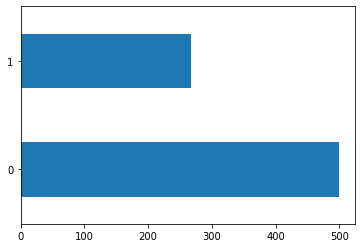

In [45]:
df['Outcome'].value_counts().plot.barh();


In [84]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


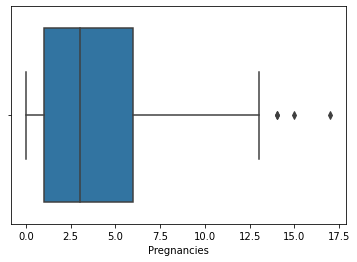

In [83]:
import seaborn as sns
sns.boxplot("Pregnancies",data=df)

In [48]:
#0 e 17 arası pregnancies

In [49]:
#outcone kalksın categorik veri
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)


In [50]:
#tran-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [51]:
from sklearn.linear_model import LogisticRegression
# Gradient Descent ile yakınsama değerini 200 olarak belirledik. Normalde 100 default olarak gelen bu değer
#yakınsama gerçekleştirirken hata vermesini önlemek için 100 den büyük bir değer veriyoruz.
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
model.intercept_
#beta0

array([-8.15284057])

In [53]:
model.coef_

array([[ 0.09071684,  0.03387699, -0.01370216,  0.00459575, -0.00139616,
         0.08792081,  0.80751366,  0.02007957]])

In [54]:
#intercept ve coef denklemde bulunan katsayılar

In [55]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Performans Ölçmek

In [56]:
 """ 
 
Performansı Ölçme Yöntemleri
True Positive, modelin pozitif sınıfı doğru bir şekilde öngördüğü bir sonuçtur.
True Negatif, modelin negatif sınıfı doğru bir şekilde öngördüğü bir sonuçtur.

False Positive, modelin pozitif sınıfı yanlış bir şekilde tahmin ettiği bir sonuçtur.

False Negative, modelin negatif sınıfı yanlış bir şekilde tahmin ettiği bir sonuçtur.

 """

' \n\nPerformansı Ölçme Yöntemleri\nTrue Positive, modelin pozitif sınıfı doğru bir şekilde öngördüğü bir sonuçtur.\nTrue Negatif, modelin negatif sınıfı doğru bir şekilde öngördüğü bir sonuçtur.\n\nFalse Positive, modelin pozitif sınıfı yanlış bir şekilde tahmin ettiği bir sonuçtur.\n\nFalse Negative, modelin negatif sınıfı yanlış bir şekilde tahmin ettiği bir sonuçtur.\n\n'

In [57]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,98,9
Actual Negative,18,29


In [86]:
#98+28/toplam---> accuracy

In [87]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7407407407407407

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#goruntu
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


In [62]:
model.predict_proba(X_test)[0:10]
#probability

array([[0.04012218, 0.95987782],
       [0.83480453, 0.16519547],
       [0.90532309, 0.09467691],
       [0.36651791, 0.63348209],
       [0.87705774, 0.12294226],
       [0.96189783, 0.03810217],
       [0.25878686, 0.74121314],
       [0.15273241, 0.84726759],
       [0.62433368, 0.37566632],
       [0.63259064, 0.36740936]])

In [63]:
y_test[0:10]

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [64]:
y_probability=model.predict_log_proba(X_test)
y_probability=y_probability[:,1]

y_probability[0:10]

array([-0.04094927, -1.80062585, -2.3572851 , -0.45652355, -2.09604047,
       -3.26748399, -0.29946705, -0.1657387 , -0.97905398, -1.00127863])

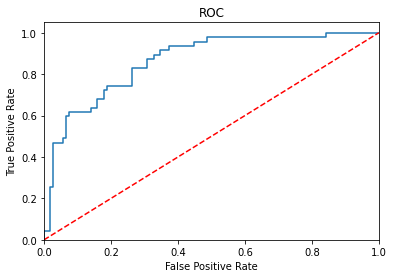

In [65]:
 #roc ve auc ta goruntuleme

 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


In [90]:
#knn---> en yakin komsulara bakarak seciyor

import numpy as np
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine.target

wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


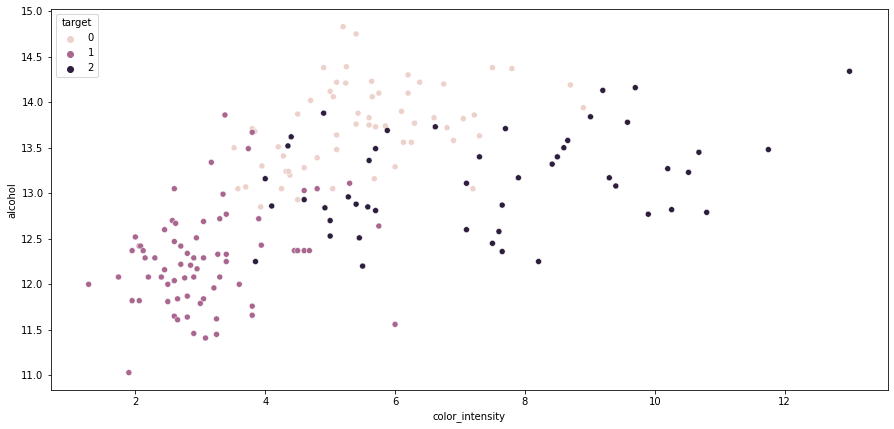

In [93]:
#scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.scatterplot(x='color_intensity', y='alcohol', hue='target', data=wine_data)

In [94]:
#train test split


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
#winetarget--> y

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #k =5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 2, 0, 2, 1, 1, 1])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7407407407407407

In [97]:
from sklearn.model_selection import GridSearchCV  #cross validation--> best model

knn_tuning = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn_tuning, param_grid, cv=5)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
#k=10 verirsek
print("best parameter:",knn_gs.best_params_)
print("The mean accuracy of the scores:",knn_gs.best_score_)

best parameter: {'n_neighbors': 10}
The mean accuracy of the scores: 0.7503333333333333


## Support vector Machine

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [88]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

iris_data.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [89]:
X = iris.data
y = iris.target
print(y) #labellll
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [99]:
from sklearn.svm import SVC
#c1-->regularizasyon
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [100]:
svm_predictions

array([2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 0, 1, 0, 2, 0, 2, 1, 2, 1])

In [101]:
accuracy=svm_model_linear.score(X_test,y_test)
accuracy

0.9629629629629629